Using device: cpu
The shapes of our data match !
Epoch [100/4000], Loss: 0.3405
Epoch [200/4000], Loss: 0.2483
Epoch [300/4000], Loss: 0.1971
Epoch [400/4000], Loss: 0.1637
Epoch [500/4000], Loss: 0.1400
Epoch [600/4000], Loss: 0.1221
Epoch [700/4000], Loss: 0.1083
Epoch [800/4000], Loss: 0.0971
Epoch [900/4000], Loss: 0.0880
Epoch [1000/4000], Loss: 0.0804
Epoch [1100/4000], Loss: 0.0740
Epoch [1200/4000], Loss: 0.0685
Epoch [1300/4000], Loss: 0.0638
Epoch [1400/4000], Loss: 0.0596
Epoch [1500/4000], Loss: 0.0560
Epoch [1600/4000], Loss: 0.0527
Epoch [1700/4000], Loss: 0.0498
Epoch [1800/4000], Loss: 0.0472
Epoch [1900/4000], Loss: 0.0448
Epoch [2000/4000], Loss: 0.0427
Epoch [2100/4000], Loss: 0.0408
Epoch [2200/4000], Loss: 0.0390
Epoch [2300/4000], Loss: 0.0374
Epoch [2400/4000], Loss: 0.0359
Epoch [2500/4000], Loss: 0.0345
Epoch [2600/4000], Loss: 0.0332
Epoch [2700/4000], Loss: 0.0320
Epoch [2800/4000], Loss: 0.0309
Epoch [2900/4000], Loss: 0.0298
Epoch [3000/4000], Loss: 0.0288


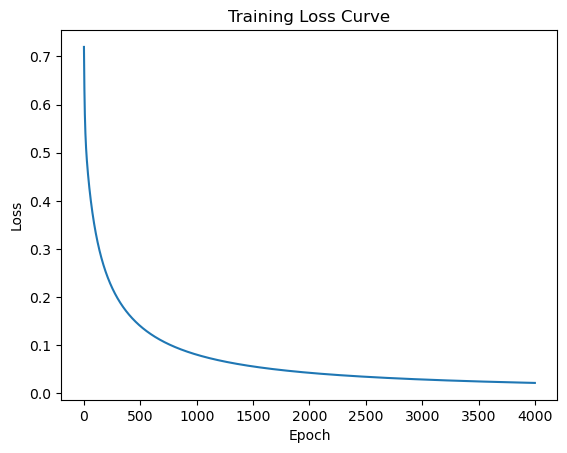

In [2]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")
    
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x

    # Example usage:
model = Perceptron(2, 1)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
    
plot_loss(loss_values)

In [3]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)
output = (test_output > 0.5).float()
print(output)
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

tensor([[2.4300e-05],
        [2.5148e-02],
        [2.5148e-02],
        [9.6477e-01]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.]])
Saving model to: models\01_pytorch_perceptron.pth
